In [52]:
# Import random shit
import numpy as np
import matplotlib.pyplot as plt

# Get that yum yum sklearn
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer as TFT

# Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

%matplotlib inline

In [13]:
def load_data(filename):
    """
    Load our data from text file
    
    Inputs:
        filename: String file name
        
    Outputs:
        array: A (N, ) array with classification of each point
    """
    
    array = np.loadtxt(filename, skiprows=1, delimiter=',')
    return array[:, 1]

def convert(y_test, filename):
    """
    Converts the y_test vector to submission file and saves to filename
    
    Inputs:
        y_test: A (N, ) array with the predicted results for the test set
        filename: String name of file
        
    Outputs:
        None
    """
    
    text_file = np.array([[i+1, int(y_test[i])] for i in range(len(y_test))])
    np.savetxt(filename, text_file, fmt='%d', delimiter=',')
    
    f = open(filename,'r+')
    lines = f.readlines() # read old content
    f.seek(0) # go back to the beginning of the file
    f.write('Id,Prediction\n') # write new content at the beginning
    for line in lines: # write old content after new
        f.write(line)
    f.close()

In [10]:
# Easy voting
x_train_vote = np.empty((10000, 5))
x_train_vote[:, 0] = load_data('./AdaBoost_depth2.txt')
x_train_vote[:, 1] = load_data('./rand_for_leaf1.txt')
x_train_vote[:, 2] = load_data('./extra_for_leaf1.txt')
x_train_vote[:, 3] = -1*(load_data('./d_nn_1.txt')) + np.ones(10000)
x_train_vote[:, 4] = load_data('./drunk.txt')

In [66]:
david = np.loadtxt('ensemble.txt')

In [11]:
weights = np.array([0.8196**2, 0.831**2, 0.8448**2, 0.8404**2, 0.8392**2])

final = np.dot(x_train_vote, weights.T) / np.sum(np.square(weights))
final = np.floor(final + np.ones(len(final)) * 0.5)

In [85]:
np.sum(np.abs(david - final))

698.0

In [12]:
convert(final, 'votes_4.txt')

# Voting with probabilities:

In [73]:
ada_vote = np.loadtxt('AdaBoost_prob.txt', delimiter=' ')
rand_vote = np.loadtxt('prob_rand.txt', delimiter=' ')
extra_vote = np.loadtxt('prob_extra.txt', delimiter=' ')
MNB_vote = np.loadtxt('MNB_prob.txt', delimiter=' ')
log_vote = np.loadtxt('log_reg_probs.txt', delimiter=' ')
SVM_vote = np.loadtxt('SVM_probs.txt', delimiter=' ')
nn_vote = np.empty((len(ada_vote), 2))
nn_vote[:, 0] = np.ones(len(ada_vote)) - np.loadtxt('NN_ReLU_final.txt')
nn_vote[:, 1] = np.loadtxt('NN_ReLU_final.txt')
nn_sig = np.empty((len(ada_vote), 2))
nn_sig[:, 0] = np.ones(len(ada_vote)) - np.loadtxt('sigmoid_probs.txt')
nn_sig[:, 1] = np.loadtxt('sigmoid_probs.txt')
xg_vote = np.empty((len(ada_vote), 2))
xg_vote[:, 1] = np.loadtxt('xgboost_opt_probs.txt', skiprows=1, delimiter=',')[:, 1]
xg_vote[:, 0] = np.ones(len(ada_vote)) - xg_vote[:, 1]

In [50]:
# Load our data and shit
train_data = np.loadtxt('./training_data.txt', skiprows=1, delimiter=' ')
test_data = np.loadtxt('./test_data.txt', skiprows=1, delimiter=' ')

In [53]:
# Split training and test set into x and y
scaler = StandardScaler()
scaler_t = TFT()

x_train = scaler_t.fit_transform(train_data[:, 1:])

x_test = scaler_t.transform(test_data)

In [97]:
test = (np.sqrt(ada_vote) +
        np.sqrt(rand_vote) +
        np.sqrt(extra_vote) + 
        np.sqrt(MNB_vote) + 
        np.sqrt(log_vote) + 
        np.sqrt(SVM_vote) + 
        np.sqrt(nn_vote) + 
        np.sqrt(nn_sig) + 
        np.sqrt(xg_vote) ) / 9

q_inds = [ind for ind in range(len(test)) if abs(test[ind, 0] - test[ind, 1]) < 0.1]

In [98]:
len(q_inds)

1176

In [61]:
[test_data[ind] for ind in q_inds]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [78]:
weights = [0.8495**2, 0.862**2, 0.85365**2, 0.8444**2, 0.845**2, 0.851**2]
models = [np.square(extra_vote),
          np.square(nn_vote),
          np.square(log_vote),
          np.square(xg_vote),
          np.square(SVM_vote),
          np.square(nn_sig)]
final = np.zeros(ada_vote.shape)

for ind, weight in enumerate(weights):
    final += weight * models[ind]
    
final_w = np.argmax(final, axis=1)

In [14]:
votes_7 = load_data('votes_7.txt')
votes_2 = load_data('votes_2.txt')
votes_5 = load_data('votes_5.txt')
votes_6 = load_data('votes_6.txt')
votes_3 = load_data('votes_3.txt')
votes_4 = load_data('votes_4.txt')

In [16]:
print(np.sum(np.abs(votes_7 - votes_2)))
print(np.sum(np.abs(votes_5 - votes_2)))
print(np.sum(np.abs(votes_6 - votes_2)))
print(np.sum(np.abs(votes_3 - votes_2)))
print(np.sum(np.abs(votes_4 - votes_2)))

783.0
734.0
735.0
458.0
306.0


In [79]:
convert(final_w, 'votes_9.txt')

# Train on training data (doesn't really work)

In [10]:
x_train = np.empty((len(nn_train), 4))
x_train[:, 0] = load_data('./AdaBoost_train.txt')
x_train[:, 1] = load_data('./rand_for_train.txt')
x_train[:, 2] = load_data('./extra_for_train.txt')
x_train[:, 3] = load_data('./y_training_nets.txt')

In [9]:
# Load our data and shit
train_data = np.loadtxt('./training_data.txt', skiprows=1, delimiter=' ')
test_data = np.loadtxt('./test_data.txt', skiprows=1, delimiter=' ')

# Split training and test set into x and y
y_train = train_data[:, 0]

In [12]:
x_train[:10]

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [23]:
c = np.arange(-1, 5)
errors = np.empty(len(c))
ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
clf = LinearSVC()
    
for ind, reg in enumerate(c):
    print(reg)
    clf.set_params(C=np.exp(reg))
    errors[ind] = np.mean(cross_val_score(clf, x_train, y_train, cv=ss))
    print(clf.coef_)

-1


AttributeError: 'LinearSVC' object has no attribute 'coef_'

In [24]:
clf = LinearSVC()
clf.fit(x_train, y_train)
print(clf.coef_)

[[  1.99882819e+00   2.32857545e-03  -3.56624451e-04  -9.19096588e-04]]


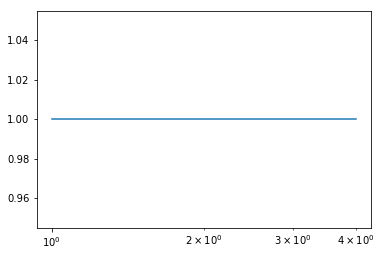

In [17]:
plt.figure()
plt.semilogx(c, errors)

In [22]:
errors

array([ 0.99995,  0.99995,  0.99995,  0.99995,  0.99995,  0.99995])